In [10]:
from statsmodels.formula.api import ols
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

In [11]:
profile_1819 = pd.read_csv('../data/chicago_data_portal_csv_files/Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv')
hs_1819 = profile_1819[profile_1819['Is_High_School']==True]
hs_1819.head()

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,Is_Pre_School,Summary,Administrator_Title,Administrator,Secondary_Contact_Title,Secondary_Contact,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Facebook,Twitter,Youtube,Pinterest,Attendance_Boundaries,Grades_Offered_All,Grades_Offered,Student_Count_Total,Student_Count_Low_Income,Student_Count_Special_Ed,Student_Count_English_Learners,Student_Count_Black,Student_Count_Hispanic,Student_Count_White,Student_Count_Asian,Student_Count_Native_American,Student_Count_Other_Ethnicity,Student_Count_Asian_Pacific_Islander,Student_Count_Multi,Student_Count_Hawaiian_Pacific_Islander,Student_Count_Ethnicity_Not_Available,Statistics_Description,Demographic_Description,Dress_Code,PreK_School_Day,Kindergarten_School_Day,School_Hours,Freshman_Start_End_Time,After_School_Hours,Earliest_Drop_Off_Time,Classroom_Languages,Bilingual_Services,Refugee_Services,Title_1_Eligible,PreSchool_Inclusive,Preschool_Instructional,Significantly_Modified,Hard_Of_Hearing,Visual_Impairments,Transportation_Bus,Transportation_El,Transportation_Metra,School_Latitude,School_Longitude,Average_ACT_School,Mean_ACT,College_Enrollment_Rate_School,College_Enrollment_Rate_Mean,Graduation_Rate_School,Graduation_Rate_Mean,Overall_Rating,Rating_Status,Rating_Statement,Classification_Description,School_Year,Third_Contact_Title,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Network,Is_GoCPS_Participant,Is_GoCPS_PreK,Is_GoCPS_Elementary,Is_GoCPS_High_School,Open_For_Enrollment_Date,Closed_For_Enrollment_Date
0,400172,9647,66255,ASPIRA - BUSINESS & FINANCE HS,ASPIRA Business and Finance,HS,True,False,False,False,The ASPIRA Business and Finance High School ta...,Director,Dr. Hector Freytas,Assistant Principal,Veronica Galindo,2989 N MILWAUKEE AVE,Chicago,Illinois,60618,7.732521e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.aspirail.org/ASPIRASchools,https://www.facebook.com/ASPIRABusiness,https://twitter.com/ASPIRABusiness,NaN,NaN,False,"9,10,11,12",9-12,633,414,130,195,17,597,10,4,1,0,0,4,0,0,There are 633 students enrolled at ASPIRA - BU...,The largest demographic at ASPIRA - BUSINESS &...,True,NaN,NaN,7:30AM-4:30PM,NaN,3:15PM-4:30PM,7:30AM,"Spanish, Spanish for Heritage Speakers",True,NaN,True,NaN,NaN,NaN,NaN,NaN,56,Blue,NaN,41.935726,-87.718204,NaN,NaN,NaN,68.2,NaN,78.2,Level 2+,NOT APPLICABLE,"This school received a Level 2+ rating, which ...","Schools that are open to all Chicago children,...",School Year 2018-2019,Dean of Students,Mike Simball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charter,True,False,False,True,07/01/2015 12:00:00 AM,NaN
2,609780,2090,41111,MARINE LEADERSHIP AT AMES HS,Marine Leadership Academy at Ames,HS,True,True,False,False,Marine Leadership Academy prepares leaders in ...,Principal,Mrs.Erin A Galfer,Other,Juan Carlos Zayas,1920 N HAMLIN AVE,Chicago,Illinois,60647,7.735345e+09,7.735345e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://marine.cps.edu,https://www.facebook.com/marineleadershipacademy,NaN,NaN,NaN,False,"7,8,9,10,11,12",7-12,847,825,79,158,17,817,8,2,1,0,0,2,0,0,There are 847 students enrolled at MARINE LEAD...,The largest demographic at MARINE LEADERSHIP A...,True,NaN,NaN,07:45 AM-03:25 PM,NaN,NaN,NaN,Spanish,True,NaN,True,NaN,NaN,NaN,NaN,NaN,73,NaN,NaN,41.916045,-87.721742,NaN,NaN,59.2,68.2,NaN,78.2,Level 1,GOOD STANDING,"This school received a Level 1 rating, which i...",For students who wish to develop leadership an...,School Year 2018-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISP,True,False,True,True,09/01/2004 12:00:00 AM,NaN
5,609750,1750,49051,SIMPSON HS,Simpson Academy HS for Young Women,HS,True,True,True,False,``,Principal,Mrs.Sherita D Carter-King,Guidance Counselor,Veronica Falls,1321 S PAULINA ST,Chicago,Illinois,60608,7.735348e+09,7

In [12]:
df_simple = hs_1819[['Graduation_Rate_School', 'Student_Count_Total']]

In [25]:
formula =  'Graduation_Rate_School~Student_Count_Total'
results = ols(formula, df_simple).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Graduation_Rate_School   R-squared:                       0.189
Model:                                OLS   Adj. R-squared:                  0.183
Method:                     Least Squares   F-statistic:                     32.34
Date:                    Tue, 16 Feb 2021   Prob (F-statistic):           7.33e-08
Time:                            08:07:40   Log-Likelihood:                -630.73
No. Observations:                     141   AIC:                             1265.
Df Residuals:                         139   BIC:                             1271.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              60.8182      2.655     22.904      0.000      55.568      66.068
Student_Count_Total     0.0157      0.003      5.687      0.000       0.010       0.021
==============================================================================
Omnibus:                       47.287   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.884
Skew:                          -1.593   Prob(JB):                     2.24e-19
Kurtosis:                       5.115   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
results.resid.var()

452.96480358655907

The easiest calculation would be the standard error for Student_Count_Total.  
[Intro to Statisical Learning: 7:31](https://www.youtube.com/watch?v=PsE9UqoWtS4&list=PL5-da3qGB5IBSSCPANhTgrw82ws7w_or9)

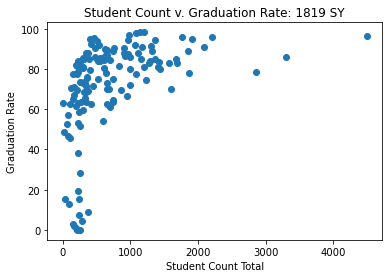

In [20]:
fig, ax = plt.subplots()
y = df_simple["Graduation_Rate_School"]
x = df_simple["Student_Count_Total"]

ax.scatter(x,y)
ax.set_xlabel('Student Count Total')
ax.set_ylabel('Graduation Rate')
ax.set_title('Student Count v. Graduation Rate: 1819 SY');

In [69]:
num = results.resid.var(ddof=1)
den = sum((df_simple['Student_Count_Total'] - df_simple['Student_Count_Total'].mean())**2)

In [70]:
import numpy as np
st_err_b1 = np.sqrt(num/den)
# Not 100% confident about this number, considering the following cell
st_err_b1

0.00256317091488315

In [55]:
# this formula for the t-stat does not equate precisely
results.params[1]/st_err_b1

6.128630823602625

In [153]:
n_lm = results.nobs

In [154]:
se_lm =  results.resid.std(ddof=1) * np.sqrt((n_lm-1)/(n_lm-2))
se_lm

21.359390047019296

In [155]:
# Calculate Standard Error from people.duke.edu/~rnau/mathreg.htm
se_lm/df_simple['Student_Count_Total'].std(ddof=1)/np.sqrt(n_lm-1)

0.0029329581100653434

##### Calculate Beta

In [125]:
# Here is the correct standard error
# Thanks to this post https://stackoverflow.com/questions/31523921/print-std-err-value-from-statsmodels-ols-results
results.bse[1]

0.0027621555031774

In [112]:
results.params[1]/results.bse[1]

5.68712668676486

In [98]:
results.params[1]/results.HC0_se[1]

4.789017422927394

In [88]:
X = df_simple['Student_Count_Total']
# np.invert(np.diag(X.T*X))*X.T*np.diag(results.resid**2)

array([[-400690,      -1,      -1, ...,      -1,      -1,      -1],
       [     -1, -717410,      -1, ...,      -1,      -1,      -1],
       [     -1,      -1,   -1157, ...,      -1,      -1,      -1],
       ...,
       [     -1,      -1,      -1, ..., -367237,      -1,      -1],
       [     -1,      -1,      -1, ...,      -1,  -92417,      -1],
       [     -1,      -1,      -1, ...,      -1,      -1,   -9217]])